# Image Processing Basic Concepts

### This file walks the reader through the basic concepts needed to get started with image processing

# 1. Load an Image

In [1]:
import imutils
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

Reading the image from the file and display it

In [2]:
img = cv2.imread('whitepup.jpg')

This is to show a pop-up image. Press Any Key to exit. 

(Don't use the X to exit! It uses the same kernel as jupyter and if you dont let jupyter close the window everything will hang, congrats)

In [3]:
cv2.startWindowThread()
cv2.namedWindow('Pupper')
cv2.imshow('Pupper',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

-1

A safer and more easily documented way. But remember: OpenCV uses BGR while matplotlib uses RGB

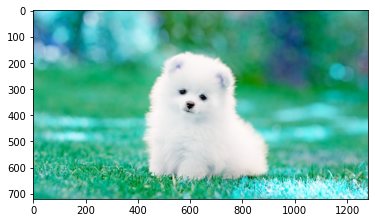

In [3]:
plt.imshow(img)
plt.show()

In [3]:
h,w,d = img.shape 
h,w,d 
#height (rows), width, depth (rgb)

(720, 1280, 3)

There is an annoying label and border. Let's define a function to plot for us

In [83]:
def cvplot(img,title):
    plt.imshow(img)
    plt.axis('off')
    plt.tick_params(
        axis = 'both',      # changes apply to both
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labeltop = False) # labels along the bottom edge are off
    plt.title(title)
    plt.show()

# 2. Color Pixels and Slicing Images

- A color space, for example, (<font color='red'>R</font>, <font color='green'>G</font>, <font color='blue'>B</font>)

- Pixel range [0,255] each for B, G, R. aka total number of colors possible = $256^{3}$ = approx 16 million. That's why LED displays have 16M colors! Now you know that's an ad gimmick :X )

Let's get the Pixel Color Values for middle pixel in the image

In [64]:
import math
b,g,r = img[math.ceil(h/2),math.ceil(w/2)]
b,g,r

(231, 229, 229)

I want to try extracting the doggo using slicing (manually for now)

From the plot above, the doggo's face is approximately from: 300 to 400(height) and 500 to 700 (width)

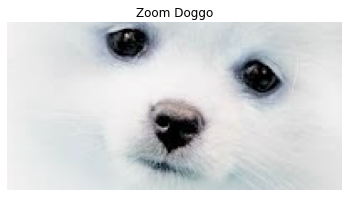

In [84]:
cvplot(img[300:400,500:700],'Zoom Doggo')
# plt.show()

UwU

# 3. Aspect Ratios and Resizing

- Doggo is very large (720, 1280, 3)
- Shrink doggo but dont distort
- Processing is faster on smaller images

We can use a multiple of the original image size:

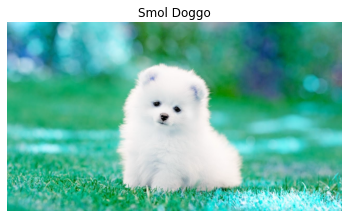

In [85]:
targetsize = (math.ceil(w/2),math.ceil(h/2))
smallimg = cv2.resize(img,targetsize)
cvplot(smallimg, 'Smol Doggo')

That looks the same but if you notice the pixel value labels it actually is smaller than the one above :)

Another way is to specify the aspect ratio. Aspect ratio is defined as: The ratio of the height to the width. 

$ Aspect Ratio (r) = \frac{Height (h) }{ Width (w) }$

So, for the image above, its 

$ 720/1280 = 0.5625 $


So, to calculate the correct aspect ratio if we want the image width to be 400 px, then, the height is: 

$ 0.5625 x 400 = 225 $

Let's set this:

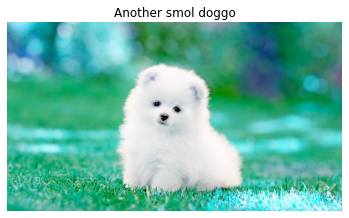

In [86]:
# targetsize = (math.ceil(w/2),math.ceil(h/2))
smallimg2 = cv2.resize(img,(400,225))
cvplot(smallimg2, 'Another smol doggo')


That was a lot of unecessary math. Let's automate it xD

In [22]:

def getaspect(img):
    ar= img.shape[0]/img.shape[1]
    return int(img.shape[1]), int(img.shape[1]*ar)

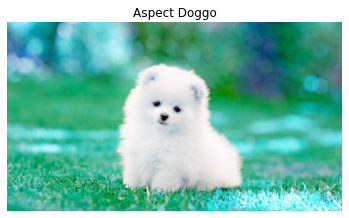

In [87]:
cvplot(cv2.resize(img, getaspect(img)), 'Aspect Doggo')

Now that we have a useful function to do that for us, we can continue to change the size without repeatedly calcualting it manually! :)

# 4. Rotating Images

Since an image is basically a very large matrix, we rotate it by multipling with a rotation matrix. 
A rotation matrix is a predefined matrix that when multiplied with the Original matrix, results in the new rotated matrix. 

For Example, for a 2x2 matrix, the Rotation Matrix R is given by: 

\begin{bmatrix}
cos\theta & sin\theta\\
-sin\theta & cos\theta
\end{bmatrix}

Where theta is the angle of rotation. By convention, theta is positive for CCW rotation and negative for clockwise rotation. 
i.e. to rotate by 90 degrees Clockwise, you substitute -90 in the matrix: 

\begin{bmatrix}
cos(-90) & sin(-90)\\
-sin(-90) & cos(-90)
\end{bmatrix}

Which results in the matrix: 
\begin{bmatrix}
-0.5 & 0\\
0 & 0.5
\end{bmatrix}

So now, if we want to rotate our image, we multiply it with this matrix, and the result is the rotated matrix!

But anyway, we don't have to calculate this, we can do it on openCV. Just remember: 
CW IS NEGATIVE!!! 


In [27]:
# Find the center of the image as the point at which we want to rotate it by
center = w//2, h//2 

# get the rotation matrix
R = cv2.getRotationMatrix2D(center,-45,1.0)
rot_img = cv2.warpAffine(img, R, (w,h))

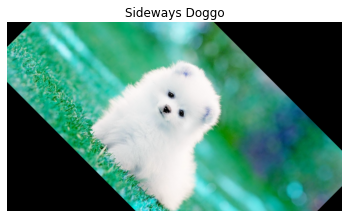

In [88]:
cvplot(rot_img, 'Sideways Doggo')

Or, use imutils to rotate it:

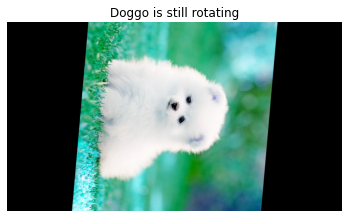

In [89]:
rotated = imutils.rotate(img, -95)
cvplot(rotated, 'Doggo is still rotating')

If you dont want it to be clipped: 

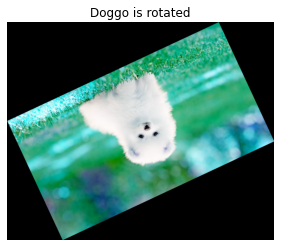

In [90]:
rotated = imutils.rotate_bound(img, 155) # take out the negative
cvplot(rotated, 'Doggo is rotated')

# 5. Smoothing 

Types of Smoothing

- Gaussian Blur: `cv2.GaussianBlur()` Gaussian filter takes the a neighborhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering

- Averaging: Convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average.
`cv2.boxFilter()` 

- Median Filter: `cv2.medianBlur()`computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise.

- Bilateral Filter: `cv2.bilateralFilter()`, which was defined for, and is highly effective at noise removal while preserving edges. But the operation is slower compared to other filter

This <a href = "https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html"> Link </a> has more detailed explanations. 

Let's try some filters:

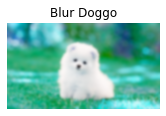

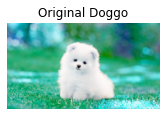

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe59dee54e0>, None)

In [100]:
# width and height of the kernel should be positive and odd
kernel = (53,53)

# setting standard deviation as 0 for X will make Y also equal 0. 
gblur = cv2.GaussianBlur(img, kernel, 0)


plt.subplot(121),cvplot(gblur, 'Gaussian Blur Doggo')
plt.subplot(122),cvplot(img, 'Original Doggo')

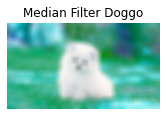

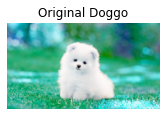

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe59dec1860>, None)

In [103]:
kernel = (53,53)
avgfilt = cv2.blur(img,kernel)

plt.subplot(121),cvplot(avgfilt, 'Median Filter Doggo')
plt.subplot(122),cvplot(img, 'Original Doggo')